2022-03-31 18:03:13,414  INFO: 2022-03-31 18:03:13.414070	start load_data


1 1h 1 1
2 1h 1 1
4 1h 1 1
6 1h 1 1


2022-03-31 18:03:14,351  INFO: 2022-03-31 18:03:14.351935	[1] load history data finished，all data num:40492
2022-03-31 18:03:14,353  INFO: 2022-03-31 18:03:14.353480	strategy.inited
2022-03-31 18:03:14,360  INFO: 2022-03-31 18:03:14.360170	now go to trading
/usr/local/lib/python3.7/site-packages/tumbler-1.0.1-py3.7-macosx-10.14-x86_64.egg/tumbler/function/technique.py:1405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name][df[name] == 0] = np.NAN
/usr/local/lib/python3.7/site-packages/tumbler-1.0.1-py3.7-macosx-10.14-x86_64.egg/tumbler/function/technique.py:1512: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[na

n:0
n:0
n:0
n:0


2022-04-01 09:21:59,572  INFO: 2022-04-01 09:21:59.567109	end trading
2022-04-01 09:21:59,629  INFO: 2022-04-01 09:21:59.629468	calculate_result
2022-04-01 09:21:59,846  INFO: 2022-04-01 09:21:59.846092	end calculate result
2022-04-01 09:21:59,847  INFO: 2022-04-01 09:21:59.847885	calculate_statistics
2022-04-01 09:21:59,889  INFO: 2022-04-01 09:21:59.888987	------------------------------
2022-04-01 09:21:59,889  INFO: 2022-04-01 09:21:59.889810	首个交易日：	2017-08-17
2022-04-01 09:21:59,892  INFO: 2022-04-01 09:21:59.892771	最后交易日：	2022-03-31
2022-04-01 09:21:59,900  INFO: 2022-04-01 09:21:59.900553	总交易日：	1688
2022-04-01 09:21:59,922  INFO: 2022-04-01 09:21:59.922533	盈利交易日：	726
2022-04-01 09:21:59,923  INFO: 2022-04-01 09:21:59.923904	亏损交易日：	962
2022-04-01 09:21:59,926  INFO: 2022-04-01 09:21:59.926699	起始资金：	1000000
2022-04-01 09:21:59,928  INFO: 2022-04-01 09:21:59.928255	结束资金：	1697550.023189999
2022-04-01 09:21:59,931  INFO: 2022-04-01 09:21:59.931674	总收益率：	69.75500231899989%
2022-04-01 0

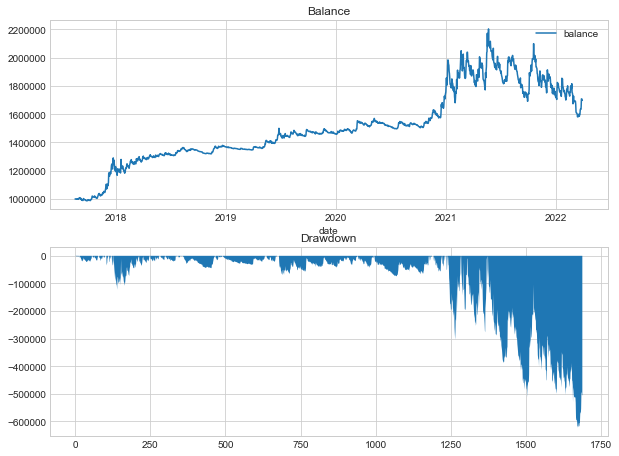

In [ ]:
# coding=utf-8

from datetime import datetime
from tumbler.constant import Interval

from tumbler.apps.backtester.backtesting import BacktestingEngine, BacktestingMode
from tumbler.apps.cta_strategy.strategies.factor_multi_period_strategy import FactorMultiPeriodStrategy
from tumbler.function.technique import PD_Technique


# def func_hour12(df):
#     df = PD_Technique.boll_strategy(df, 50, 1, name="pos_1")
#     df = PD_Technique.ema_strategy(df, 5, 20, name="pos_2")
#     df = PD_Technique.three_line_strategy(df, 5, 10, 20, name="pos_3")
#     df["pos"] = df["pos_1"] + df["pos_2"] + df["pos_3"]
#     df = df.drop(["pos_1", "pos_2", "pos_3"], axis=1)
#     return df


def func_hour6(df):
    # 3
    df = PD_Technique.three_line_strategy(df, 5, 10, 20, name="pos_1")
    df = PD_Technique.roc_strategy(df, n=30, name="pos_2")
    df = PD_Technique.kingkeltner_strategy(df, n=30, name="pos_3")
    df["pos"] = df["pos_1"] + df["pos_2"] + df["pos_3"]
    df = df.drop(["pos_1", "pos_2", "pos_3"], axis=1)
    return df


def func_hour4(df):
    # 9
    df = PD_Technique.boll_strategy(df, 50, 1, name="pos_1")
    df = PD_Technique.ema_strategy(df, 5, 20, name="pos_2")
    df = PD_Technique.three_line_strategy(df, 5, 10, 20, name="pos_3")
    df = PD_Technique.one_line_strategy(df, n=30, name="pos_4")
    df = PD_Technique.roc_strategy(df, n=30, name="pos_5")
    df = PD_Technique.four_week_strategy(df, n=30, name="pos_6")
    df = PD_Technique.kingkeltner_strategy(df, n=30, name="pos_7")
    df["pos"] = df["pos_1"] * 2 + df["pos_2"] + df["pos_3"] * 2 + df["pos_4"] + df["pos_5"] + \
                df["pos_6"] + df["pos_7"]
    df = df.drop(["pos_1", "pos_2", "pos_3", "pos_4", "pos_5", "pos_6", "pos_7"], axis=1)
    return df


def func_hour2(df):
    # 4
    df = PD_Technique.ema_strategy(df, 5, 20, name="pos_2")
    df = PD_Technique.three_line_strategy(df, 5, 10, 20, name="pos_3")
    df["pos"] = df["pos_2"] + df["pos_3"] * 3
    df = df.drop(["pos_2", "pos_3"], axis=1)
    return df


def func_hour1(df):
    # 7
    df = PD_Technique.boll_strategy(df, 50, 1, name="pos_1")
    df = PD_Technique.ema_strategy(df, 5, 20, name="pos_2")
    df = PD_Technique.three_line_strategy(df, 5, 10, 20, name="pos_3")
    df = PD_Technique.four_week_strategy(df, n=40, name="pos_4")
    df["pos"] = df["pos_1"] * 4 + df["pos_2"] + df["pos_3"] + df["pos_4"]
    df = df.drop(["pos_1", "pos_2", "pos_3", "pos_4"], axis=1)
    return df


def run():
    bar_period_factor = [
        (func_hour1, 1, Interval.HOUR.value),
        (func_hour2, 2, Interval.HOUR.value),
        (func_hour4, 4, Interval.HOUR.value),
        (func_hour6, 6, Interval.HOUR.value),
        # (func_hour12, 12, Interval.HOUR.value),
    ]

    # symbol, sllippage, rate = "eth_usdt", 0.1, 0.001
    symbol, sllippage, rate = "btc_usdt", 2, 0.001
    vt_symbol = "{}.BINANCE".format(symbol)

    setting = {
        "is_backtesting": True,
        "bar_period_factor": bar_period_factor,
        "exchange_info": {
            "exchange_name": "OKEXS",
            "account_key": "OKEXS.BTC-USD-SWAP",
            "price_tick": 0.01
        }
    }

    engine = BacktestingEngine()
    engine.set_parameters(vt_symbol="btc_usdt.BINANCE", interval=Interval.MINUTE.value,
                          start=datetime(2017, 7, 1, 8, 10), rate=rate,
                          slippage=sllippage, size=1, price_tick=0.000001,
                          capital=0, end=datetime(2022, 6, 29, 9, 50),
                          mode=BacktestingMode.BAR.value)

    filename = "/Users/szh/git/personal_tumbler/run_tumbler/tools/produce_csv_data/.tumbler/fix_{}_hour1.csv"\
        .format(symbol)

    engine.add_strategy(FactorMultiPeriodStrategy, setting)
    engine.load_data(filename=filename)
    engine.run_backtesting()
    df = engine.calculate_result()
    engine.calculate_statistics()

    engine.show_chart()

    input()


if __name__ == "__main__":
    run()
